<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

$ \ $



# ***Homework.***


$(1)$ Visualize the built model accuracy fot all built classification models, in bar chart.

In [ ]:
#(1) Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd

#(2) NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np

#(3) Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt

#(4) Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

#(5) Preprocessing allows us to standarsize our data
from sklearn import preprocessing

#(6) Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split

#(7) Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV

#(8) Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression

#(9) Support Vector Machine classification algorithm
from sklearn import svm
from sklearn.svm import SVC

#(10) Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier

#(11) K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

#(12) we import some metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics


In [ ]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

In [ ]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [ ]:
Y = data["Class"].to_numpy()

In [ ]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [ ]:
KNN = KNeighborsClassifier(n_neighbors = 4).fit(x_train, y_train)
predictions = KNN.predict(x_test)
KNN_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
KNN_JaccardIndex = metrics.jaccard_score(y_test, predictions)
KNN_F1_Score = metrics.f1_score(y_test, predictions)

In [ ]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4).fit(x_train, y_train)
predictions = Tree.predict(x_test)
Tree_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
Tree_JaccardIndex = metrics.jaccard_score(y_test, predictions)
Tree_F1_Score = metrics.f1_score(y_test, predictions)

In [ ]:
LR = LogisticRegression(solver='liblinear').fit(x_train, y_train)
predictions = LR.predict(x_test)
LR_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
LR_JaccardIndex = metrics.jaccard_score(y_test, predictions)
LR_F1_Score = metrics.f1_score(y_test, predictions)

In [ ]:
SVM =  svm.SVC(kernel = 'rbf').fit(x_train, y_train) 
predictions = SVM.predict(x_test)
SVM_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
SVM_JaccardIndex = metrics.jaccard_score(y_test, predictions)
SVM_F1_Score = metrics.f1_score(y_test, predictions)

In [ ]:
LogReg = [LR_JaccardIndex, LR_F1_Score, LR_Accuracy_Score]
SVM = [SVM_JaccardIndex, SVM_F1_Score, SVM_Accuracy_Score]
Tree = [Tree_JaccardIndex, Tree_F1_Score, Tree_Accuracy_Score]
KNN = [KNN_JaccardIndex, KNN_F1_Score, KNN_Accuracy_Score]

Resultado_d = {"LogReg":LogReg,"SVM":SVM,"Tree":Tree,"KNN":KNN}

RESULT = pd.DataFrame(Resultado_d, index=["Jaccar_Score", "F1_Score", "Accuracy"])
RESULT

,LogReg,SVM,Tree,KNN
Jaccar_Score,0.789474,0.761905,0.714286,0.727273
F1_Score,0.882353,0.864865,0.833333,0.842105
Accuracy,0.851852,0.814815,0.777778,0.777778


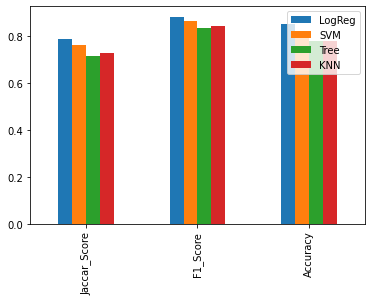

In [ ]:
RESULT.plot.bar()

$ \ $

$(2)$ Find which model has the higuest classification accuracy.

In [ ]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

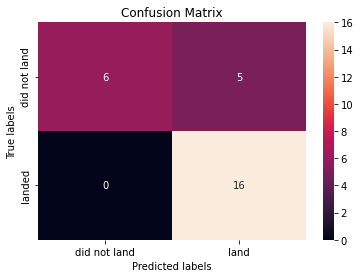

In [ ]:
parameters = {"C":[0.01, 0.1, 1],'penalty':['l2'], 'solver':['lbfgs']}
lr = LogisticRegression()


logreg_cv = GridSearchCV(lr, param_grid=parameters, cv = 10)
logreg_cv.fit(x_train, y_train)


yhat = logreg_cv.predict(x_test)
plot_confusion_matrix(y_test, yhat)

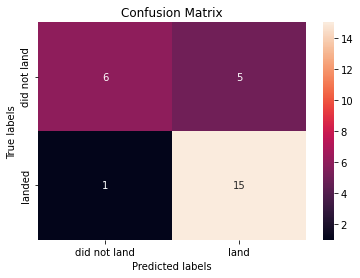

In [ ]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'), 'C': np.logspace(-3, 3, 5), 'gamma':np.logspace(-3, 3, 5)}
svm = SVC()


svm_cv = GridSearchCV(svm, param_grid = parameters, cv = 10)
svm_cv.fit(x_train, y_train)


yhat = svm_cv.predict(x_test)
plot_confusion_matrix(y_test, yhat)

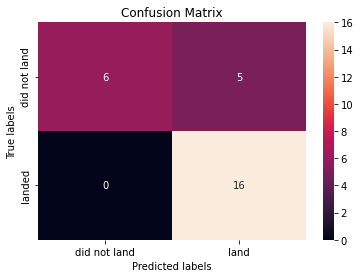

In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  'p': [1,2]}
KNN = KNeighborsClassifier()


knn_cv = GridSearchCV(KNN, param_grid = parameters, cv = 10)
knn_cv.fit(x_train, y_train)


yhat = knn_cv.predict(x_test)
plot_confusion_matrix(y_test, yhat)

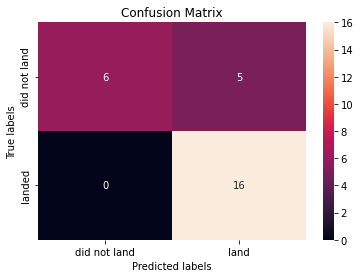

In [20]:
parameters =  {'criterion': ['gini', 'entropy'],
               'splitter': ['best', 'random'],
               'max_depth': [2*n for n in range(1,10)],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()



tree_cv = GridSearchCV(tree, param_grid = parameters, cv = 10)
tree_cv.fit(x_train, y_train)


yhat = tree_cv.predict(x_test)
plot_confusion_matrix(y_test, yhat)